In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np 
import statsmodels.formula.api as smf # regression modeling
import sklearn.linear_model # linear models
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = './birthweightlow.xlsx'


# reading the file into Python
bw = pd.read_excel(io=file,
                  usecols= 'A:R')


# outputting the fifteen ten rows of the dataset
bw.head(n=15)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [2]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {bw.shape[0]}
Features:     {bw.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     18



In [3]:
# outputting dataset information
bw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [4]:
# soft coding MEDIAN for meduc
meduc_median = bw['meduc'].median()


# filling meduc NAs with MEDIAN
bw['meduc'].fillna(value = meduc_median,
                         inplace = True)


# checking to make sure NAs are filled in
print(bw['meduc'].isnull().any())

# soft coding MEDIAN for npvis
npvis_median = bw['npvis'].median()


# filling npvis NAs with MEDIAN
bw['npvis'].fillna(value = npvis_median,
                         inplace = True)


# checking to make sure NAs are filled in
print(bw['npvis'].isnull().any())

# soft coding MEDIAN for feduc
feduc_median = bw['feduc'].median()


# filling feduc NAs with MEDIAN
bw['feduc'].fillna(value = feduc_median,
                         inplace = True)


# checking to make sure NAs are filled in
print(bw['feduc'].isnull().any())

False
False
False


In [5]:
# Information about each variable
bw.isnull().sum(axis=0)

mage      0
meduc     0
monpre    0
npvis     0
fage      0
feduc     0
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

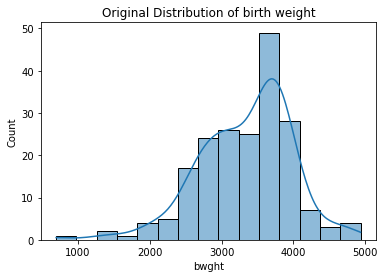

In [6]:
# developing a histogram using HISTPLOT
sns.histplot(data  = bw,
         x     = "bwght",
        kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of birth weight")
plt.xlabel(xlabel = "bwght") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

In [7]:
# dividing the variables so we can know what type of data it is 
print("""
CONTINUOUS
----------
mage
fage
bwght

INTERVAL/COUNT
--------------
meduc
feduc
cigs
drink
monpre
npvis
male
mwhte
mblck
moth
fwhte
fblck
foth

""")


CONTINUOUS
----------
mage
fage
bwght

INTERVAL/COUNT
--------------
meduc
feduc
cigs
drink
monpre
npvis
male
mwhte
mblck
moth
fwhte
fblck
foth




In [8]:
# creating a list of interval features (including birth weight)
interval_data = ['meduc','monpre','npvis','feduc','omaps','fmaps','cigs','drink','male','mwhte','mblck','moth','fwhte','fblck','foth','bwght']


# developing a correlation matrix based on interval features
bw_corr = bw[interval_data].corr(method = 'pearson')


# filtering the results to only show correlations with birth weight 
bw_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = False)

bwght     1.00
omaps     0.25
fmaps     0.25
feduc     0.13
mblck     0.13
fblck     0.12
male      0.11
meduc     0.09
npvis     0.06
moth     -0.02
fwhte    -0.04
monpre   -0.05
foth     -0.08
mwhte    -0.11
cigs     -0.57
drink    -0.74
Name: bwght, dtype: float64

In [9]:
# creating a list of continuous features (including birth weight)
continuous_data = ['mage','fage','bwght']


# developing a correlation matrix based on continuous features
bw_corr = bw[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with birth weight 
bw_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = False)

bwght    1.00
fage    -0.40
mage    -0.46
Name: bwght, dtype: float64

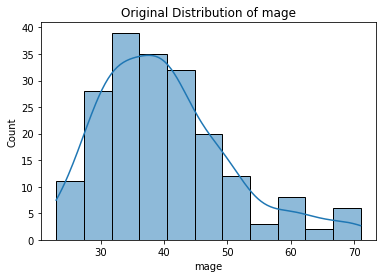

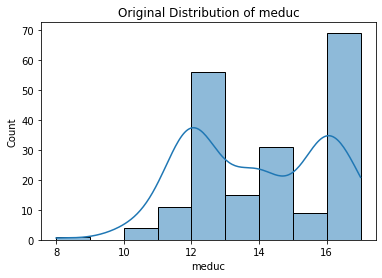

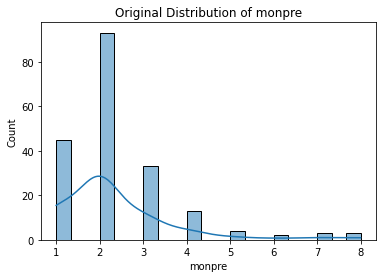

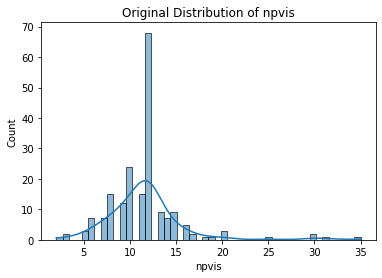

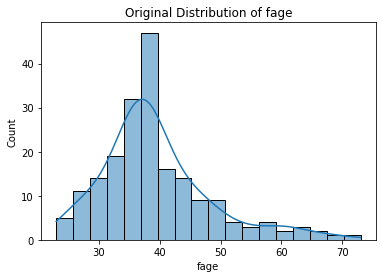

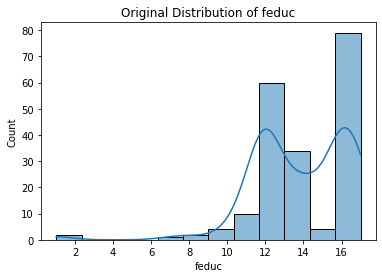

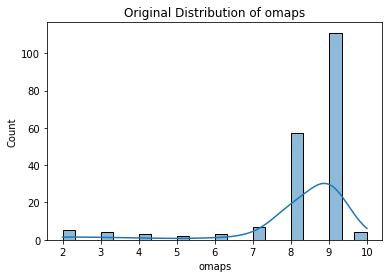

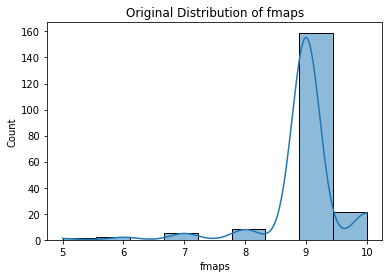

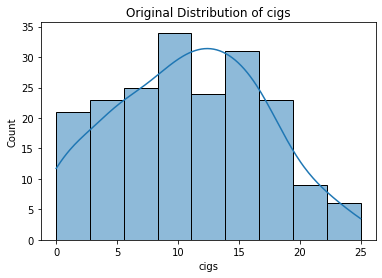

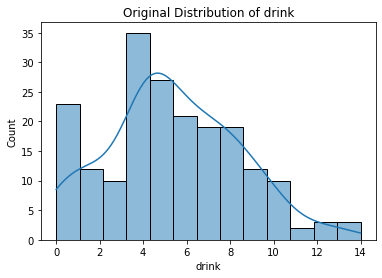

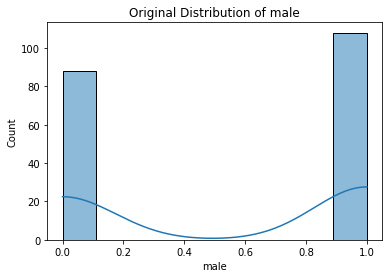

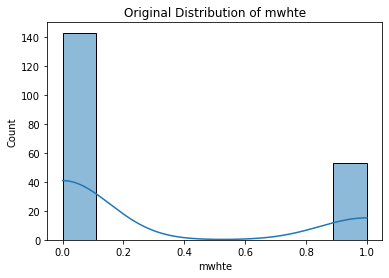

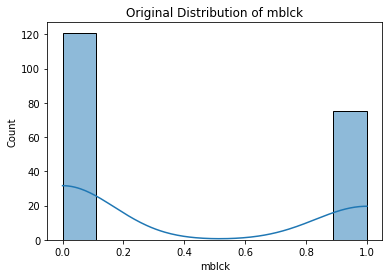

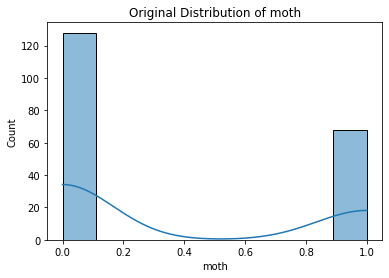

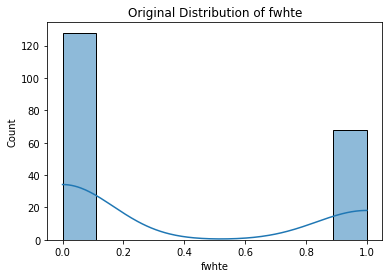

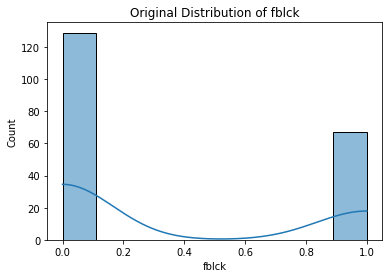

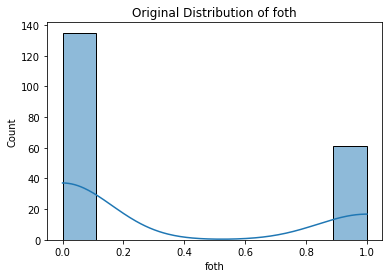

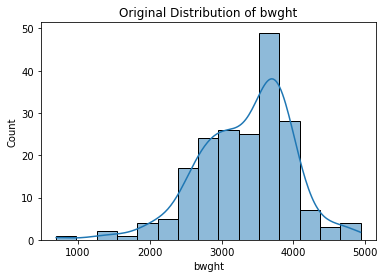

In [10]:
for column in bw:
    
    # developing a histogram
    sns.histplot(data   = bw,
    x      = f'{column}',
    kde    = True)
    
    # title and axis labels
    plt.title(label   = f"Original Distribution of {column}")
    plt.xlabel(xlabel = f'{column}') 
    plt.ylabel(ylabel = "Count")

    # displaying the histogram
    plt.show()

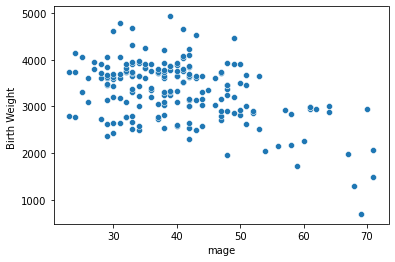

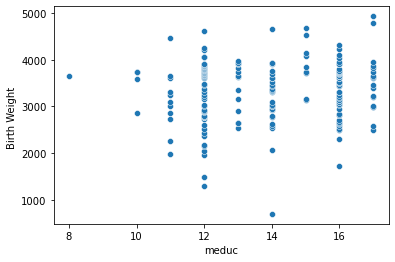

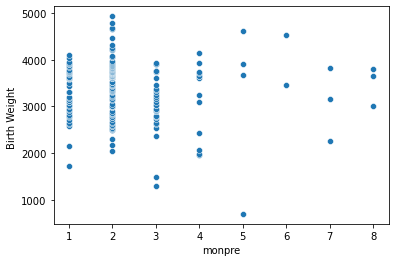

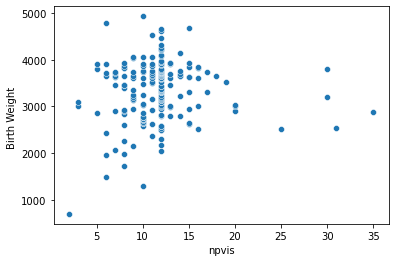

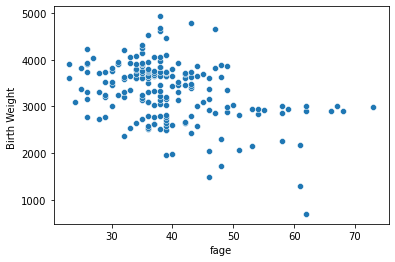

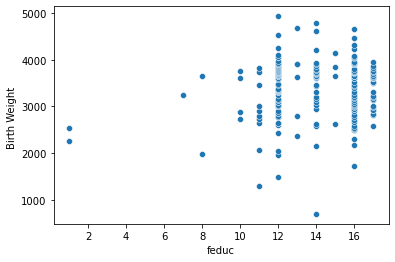

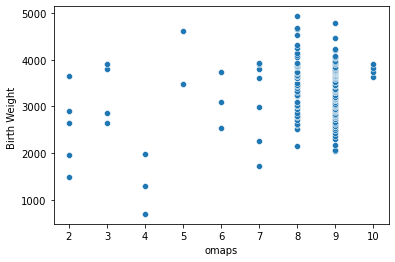

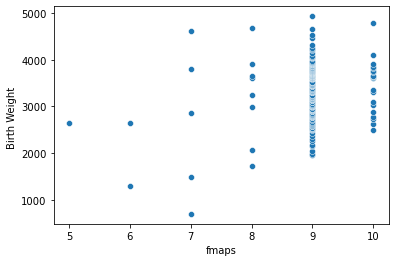

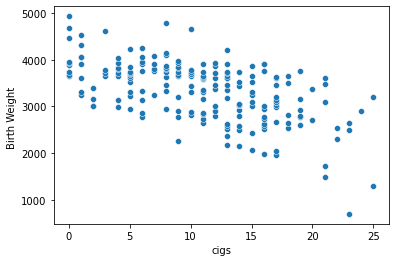

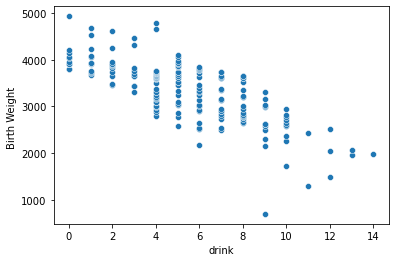

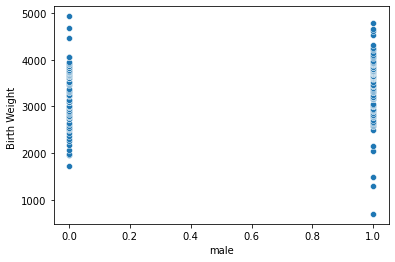

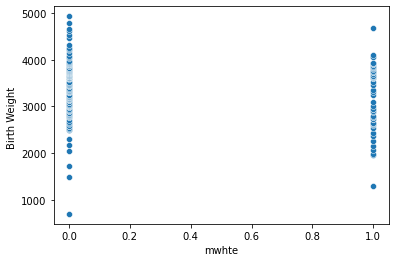

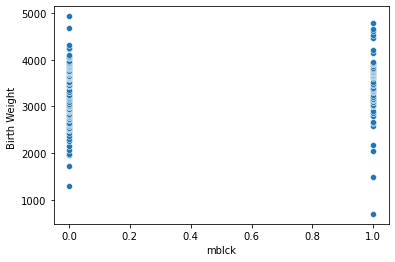

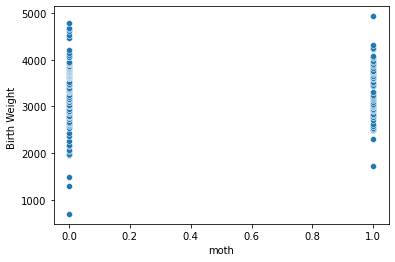

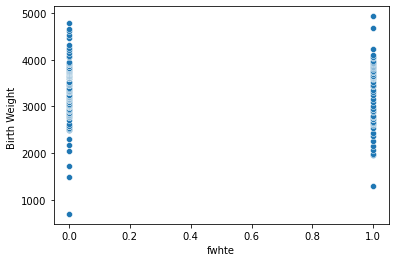

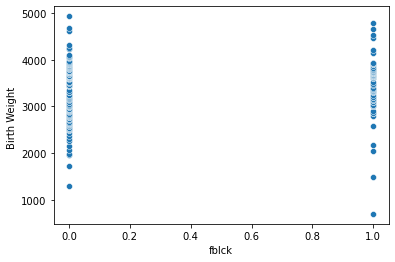

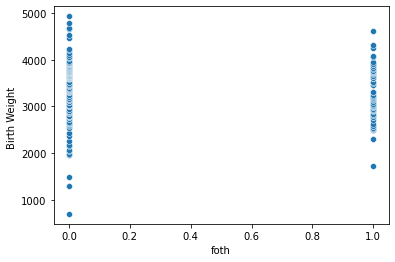

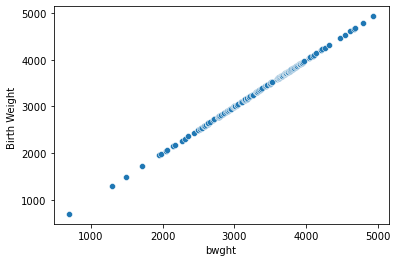

In [11]:
# developing a foor loop that shows the trends of the variables
for column in bw: 
    # developing a scatterplot
    sns.scatterplot(x    = f'{column}', 
                    y    = 'bwght',
                    data = bw)
    
    plt.xlabel(xlabel = f'{column}')
    plt.ylabel(ylabel = 'Birth Weight ')
    # showing the results
    plt.show()

In [12]:
# trying to combine the needed variables to increase the R2 
bw['n_mage']=bw['mage']**2
bw['n_fage']=bw['fage']/2
bw['n_age']=bw['n_fage']*bw['n_mage']

In [13]:
# creating bins for father age after research showed that men produce best semen under age of 40 (https://www.yourfertility.org.au/everyone/age)
bw['n_fage'] = pd.cut(bw['fage'], bins = [0,40,100], labels = ['g_condition', 'b_condition'])

print(f"""
fage bins:\n
{bw['n_fage'].value_counts()}
------
""")




fage bins:

g_condition    133
b_condition     63
Name: n_fage, dtype: int64
------



In [14]:
# creating dummies to display the above bins in the dataset 
bw = pd.get_dummies(bw, columns = ['n_fage'], prefix = 'd_', drop_first = True)

In [15]:
# describing the dataset to the columns 
bw.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,n_mage,n_age,d__b_condition
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,40.153061,13.913265,2.341837,11.607143,39.290816,13.852041,8.193878,8.964286,10.928571,5.397959,0.551020,0.270408,0.382653,0.346939,0.346939,0.341837,0.311224,3334.086735,1716.795918,36201.987245,0.321429
std,10.250055,2.040017,1.355136,4.234625,8.982725,2.586661,1.576482,0.651428,6.101282,3.001674,0.498664,0.445308,0.487279,0.477215,0.477215,0.475540,0.464180,646.700904,929.920117,28159.234475,0.468221
min,23.000000,8.000000,1.000000,2.000000,23.000000,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,697.000000,529.000000,7488.000000,0.000000
25%,33.000000,12.000000,2.000000,10.000000,34.750000,12.000000,8.000000,9.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2916.250000,1089.000000,19350.000000,0.000000
50%,39.000000,14.000000,2.000000,12.000000,38.000000,14.000000,9.000000,9.000000,11.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3452.000000,1521.000000,26205.500000,0.000000
75%,46.000000,16.000000,3.000000,12.000000,43.000000,16.000000,9.000000,9.000000,15.250000,7.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3759.500000,2116.000000,42400.000000,1.000000
max,71.000000,17.000000,8.000000,35.000000,73.000000,17.000000,10.000000,10.000000,25.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4933.000000,5041.000000,147591.000000,1.000000


In [16]:
# instantiate a model object
lm_best = smf.ols(formula = """bwght ~  n_age +
                                        cigs + 
                                        drink +
                                        foth +
                                        monpre +
                                        d__b_condition +
                                        moth +
                                        mwhte +
                                        mblck +
                                        fwhte +
                                        fblck
                                        """,
                  data = bw)


# fit the data into the model object
results = lm_best.fit()


# analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     53.71
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           4.45e-47
Time:                        01:05:57   Log-Likelihood:                -1420.6
No. Observations:                 196   AIC:                             2861.
Df Residuals:                     186   BIC:                             2894.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2748.2698     47.447     57.

In [17]:
# combined these variables in order to use it in the regression to obtain a higher R2 (ended up using none)
bw['n_mage']=bw['mage']**2
bw['n_fage']=bw['fage']/2
bw['n_age']=bw['n_fage']*bw['n_mage']
bw['c_d']=bw['cigs']*bw['drink']
bw['n_m_f']=bw['meduc']*bw['feduc']*bw['npvis']
bw['log_bwght']=np.log(bw['bwght'])
bw['logn_age']=np.log(bw['n_age'])
bw['n_moth']=bw['moth']**2
bw['n_foth']=bw['foth']**2
bw['n_male']=bw['mwhte']*bw['mblck']
bw['n_mmale']=bw['male']/2 
bw['n_oth']=bw['n_moth']**bw['n_foth']
bw['n_race']=(bw['mwhte']*bw['fwhte']*bw['fblck']*bw['mblck'])/2
bw['n_mwhte']=bw['mwhte']/2 
bw['n_fwhte']=bw['fwhte']/2 
bw['n_fblck']=bw['fblck']/2 
bw['n_mblck']=bw['mblck']/2

In [18]:
# preparing explanatory variable data
bw_data = bw.drop(['bwght', 'omaps', 'fmaps', 'mage', 'male', 
                  'n_fage', 'n_mage', 'c_d', 'n_m_f', 'log_bwght', 'logn_age', 'n_male', 'n_mmale',
                  'n_oth', 'n_race', 'n_mwhte', 'n_fwhte', 'n_fblck', 'n_mblck', 'n_moth', 'n_foth', 
                   'moth', 'foth','fblck','fwhte','mblck','mwhte', 'n_age'],
                  axis = 1)


# preparing response variables
bw_target = bw.loc[ : , 'bwght']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            bw_data,
            bw_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 8)
y-side: (147,)


Testing Data
------------
X-side: (49, 8)
y-side: (49,)



In [19]:
# merging X_train and y_train so that they can be used in statsmodels
bw_train = pd.concat([x_train, y_train], axis = 1)


# build a model
lm_best = smf.ols(formula =  """bwght ~ cigs +
                                        drink +
                                        d__b_condition +
                                        monpre +
                                        npvis +
                                        feduc +
                                        meduc
                                         """,
                                data = bw_train)


# fit the model based on the data
results = lm_best.fit()



# analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     42.83
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           1.01e-31
Time:                        01:05:57   Log-Likelihood:                -1080.2
No. Observations:                 147   AIC:                             2176.
Df Residuals:                     139   BIC:                             2200.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4069.2534    293.289     13.

In [20]:
# declaring set of x-variables
x_variables = ['cigs','drink', 'd__b_condition','feduc','meduc']

In [21]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = bw.loc[:, x_variables]



# preparing response variable
bw_target = bw.loc[:, 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            bw_data,     # x-variables
            bw_target,   # y-variable
            test_size = 0.25,
    
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            bw_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [22]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score=lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score=lr.score(x_test_OLS, y_test_OLS).round(4)


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6818
OLS Testing Score  : 0.716
OLS Train-Test Gap : 0.0342


In [23]:
# zipping each feature name to its coefficient
lr_model_values = zip(bw_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 4018.65)
('cigs', -39.67)
('drink', -120.19)
('d__b_condition', -231.07)
('feduc', 16.18)
('meduc', 18.98)


In [24]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL,y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL,y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL,y_test_FULL).round(4))


##the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL,y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL,y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.689
Lasso Testing Score  : 0.7161
Lasso Train-Test Gap : 0.0271


In [25]:
# zipping each feature name to its coefficient
lasso_model_values = zip(bw_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4412.36)
('meduc', 12.31)
('monpre', -4.18)
('npvis', 0.64)
('fage', -10.17)
('feduc', 15.47)
('cigs', -37.62)
('drink', -113.65)
('d__b_condition', -64.54)


In [26]:
# instantiate a model object
ard_model = sklearn.linear_model.ARDRegression()


# fitting the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# predicting on new data
ard_pred = ard_model.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :', ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.6873
Testing Score : 0.7132
ARD Train-Test Gap : 0.0259


In [27]:
# zipping each feature name to its coefficient
ard_model_values = zip(bw_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4559.95)
('meduc', 7.48883)
('monpre', -0.00102)
('npvis', 0.00097)
('fage', -13.01548)
('feduc', 17.32041)
('cigs', -38.23303)
('drink', -115.64946)
('d__b_condition', -2.31105)


In [28]:
# comparing results
print(f"""
Model      Train Score      Test Score         Train-Test Gap                    
-----      -----------      ----------         -------------          
OLS        {lr_train_score}           {lr_test_score}              {lr_test_gap}             
Lasso(*)   {lasso_train_score}            {lasso_test_score}             {lasso_test_gap}       
ARD        {ard_train_score}           {ard_test_score}             {ard_test_gap}

final choice (*)
""")


Model      Train Score      Test Score         Train-Test Gap                    
-----      -----------      ----------         -------------          
OLS        0.6818           0.716              0.0342             
Lasso(*)   0.689            0.7161             0.0271       
ARD        0.6873           0.7132             0.0259

final choice (*)



In [29]:
# concluding how i interpreted the variables to gain such result 
print("""
After researching about birth weight factors i was able to know how important male 
age is as a factor for giving birth to a healthy child, so i created bins for male's 
less than the age of 40 and above the age of 40. Such result increased my testing score 
tremendously especially when i added cigs and drink variables because they were a significant 
variable in effecting the birthweight of the baby. Lastly i added father and mother education 
because i personally believed that educated parents visit the doctor more when the wife is pregnant
which i believe will help in giving better birth outcome because the baby is always checked on. 

source used(https://www.yourfertility.org.au/everyone/age)

""")


After researching about birth weight factors i was able to know how important male 
age is as a factor for giving birth to a healthy child, so i created bins for male's 
less than the age of 40 and above the age of 40. Such result increased my testing score 
tremendously especially when i added cigs and drink variables because they were a significant 
variable in effecting the birthweight of the baby. Lastly i added father and mother education 
because i personally believed that educated parents visit the doctor more when the wife is pregnant
which i believe will help in giving better birth outcome because the baby is always checked on. 

source used(https://www.yourfertility.org.au/everyone/age)


